## SMAI Assignment 1

# Part1-Handling Categorical Features

In [23]:
data = pd.read_csv("train.csv") 
data= data.drop(['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company'],axis=1)
column_headers=list(data.columns.values)
cols = list(data.columns.values)
target='left'
cols.pop(cols.index(target))
data= data[cols+[target]]
train_df,test_df=divide_train_data(data,0.2)

tn=build_tree(train_df.values,option=2)
print("Accuracy",calculate_accuracy(test_df,tn))
y_test = np.array(test_df["left"])
y_pred = np.array(test_df["prediction"])
print("F1 score: ",f1_score(y_test, y_pred, average="macro", labels=np.unique(y_pred)))
print("Precision: ",precision_score(y_test, y_pred, average="macro"))
print("Recall: ",recall_score(y_test, y_pred, average="macro"))


Accuracy 0.7605696484201158
F1 score:  0.8640040444893833
Precision:  0.3802848242100579
Recall:  0.5


## Part2- Handling Both categorical and numerical Features

In [24]:
data = pd.read_csv("train.csv") 
column_headers=list(data.columns.values)
cols = list(data.columns.values)
target='left'
cols.pop(cols.index(target))
data= data[cols+[target]]
train_df,test_df=divide_train_data(data,0.2)

tn=build_tree(train_df.values,option=2)
print("Accuracy",calculate_accuracy(test_df,tn))
y_test = np.array(test_df["left"])
y_pred = np.array(test_df["prediction"])
print("F1 score: ",f1_score(y_test, y_pred, average="macro", labels=np.unique(y_pred)))
print("Precision: ",precision_score(y_test, y_pred, average="macro"))
print("Recall: ",recall_score(y_test, y_pred, average="macro"))

Accuracy 0.9692923898531375
F1 score:  0.9560932095033254
Precision:  0.9671484210086801
Recall:  0.9461124303872617


## Part3- Contrasting accuracy,precision,recall,f1 score for Entropy,Gini and Misclassification Rate

In [25]:
list1=["","Entropy","Gini","Misclassification Rate"]

for i in range(1,4):
    tn = build_tree(train_df.values,option=i)
    
    calculate_accuracy(test_df,tn)
    y_test = np.array(test_df["left"])
    y_pred = np.array(test_df["prediction"])

    print(list1[i])
    print("F1 score: ",f1_score(y_test, y_pred, average="macro"))
    print("Precision: ",precision_score(y_test, y_pred, average="macro"))
    print("Recall: ",recall_score(y_test, y_pred, average="macro"))
    print("Accuracy: ",accuracy_score(y_test, y_pred, normalize=True))

Entropy
F1 score:  0.9560932095033254
Precision:  0.9671484210086801
Recall:  0.9461124303872617
Accuracy:  0.9692923898531375
Gini
F1 score:  0.9560932095033254
Precision:  0.9671484210086801
Recall:  0.9461124303872617
Accuracy:  0.9692923898531375
Misclassification Rate
F1 score:  0.9413619409043883
Precision:  0.9650996751130758
Recall:  0.9220902207670804
Accuracy:  0.9599465954606141


## Part4- Decision Boundary

<module 'matplotlib.pyplot' from '/home/suchismith/tutorials/env/lib/python3.5/site-packages/matplotlib/pyplot.py'>

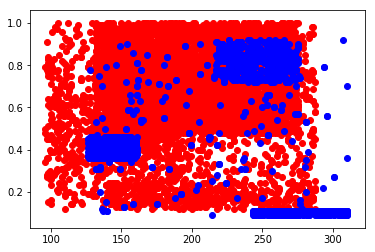

In [24]:

train_df1=train_df[["average_montly_hours","satisfaction_level","left"]]
plt1=train_df1[(train_df['left'] == 0)]
plt2=train_df1[(train_df['left'] != 0)]

plt.scatter(plt1["average_montly_hours"],plt1["satisfaction_level"],marker='o',color='r',label="yes")
plt.scatter(plt2["average_montly_hours"],plt2["satisfaction_level"],marker='o',color='b',label="no")
plt

## Part5- Plot of Training and Validation error  Vs Depth

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0.1805138471805139, 0.12612612612612617, 0.04493382271160051, 0.03125347569792014, 0.02524746969191416, 0.02424646869091318, 0.023467912356801235, 0.023134245356467575, 0.023134245356467575, 0.023134245356467575, 0.023134245356467575]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


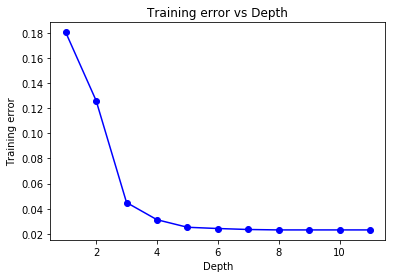

In [25]:
list_of_depth=[]
list_of_error=[]

for i in range(1,12):
    
    tn = build_tree(train_df.values,max_depth=i)
    train_error=1-calculate_accuracy(train_df,tn)
    train_df=train_df.drop("prediction",axis=1)
    list_of_depth.append(i)
    list_of_error.append(train_error)

print(list_of_depth)
print(list_of_error)
x = np.array(list_of_depth)
y = np.array(list_of_error)
colors = (0,0,0)
area = np.pi*3
print(list_of_depth)
plt.plot(x,y,marker='o', color='b')
plt.title('Training error vs Depth')
plt.xlabel('Depth')
plt.ylabel('Training error')
plt.show()



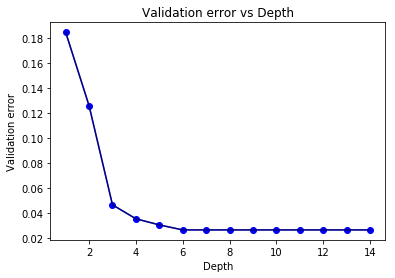

In [52]:
list_of_depth=[]
list_of_error=[]

for i in range(1,15):
    
    tn = build_tree(train_df.values,max_depth=i)
    train_error=1-calculate_accuracy(test_df,tn)
    list_of_depth.append(i)
    list_of_error.append(train_error)

x = np.array(list_of_depth)
y = np.array(list_of_error)
colors = (0,0,0)
area = np.pi*3
 
plt.plot(x,y,marker='o', color='b')
plt.plot(x, y,c=colors, alpha=0.5)
plt.title('Validation error vs Depth')
plt.xlabel('Depth')
plt.ylabel('Validation error')
plt.show()

[3, 7, 15, 25, 35, 43, 51, 61, 73]


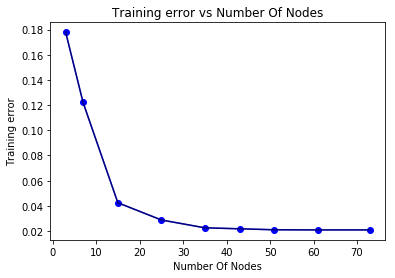

In [51]:
list_of_counts=[]
list_of_error=[]
global count_of_nodes
count_of_nodes=0
for i in range(1,10):
    
    tn = build_tree(train_df.values,min_samples=1,max_depth=i)
    train_error=1-calculate_accuracy(train_df,tn)
    global count_of_nodes
    list_of_counts.append(count_of_nodes)
    count_of_nodes=0
    train_df=train_df.drop("prediction",axis=1)
    list_of_error.append(train_error)
print(list_of_counts)
x = np.array(list_of_counts)
y = np.array(list_of_error)
colors = (0,0,0)
area = np.pi*3
 
plt.plot(x,y,marker='o', color='b')
plt.plot(x, y,c=colors, alpha=0.5)
plt.title('Training error vs Number Of Nodes')
plt.xlabel('Number Of Nodes')
plt.ylabel('Training error')
plt.show()

In [49]:
global count_of_nodes
count_of_nodes=0
build_tree(train_df.values,min_samples=1,max_depth=6)
count_of_nodes

43

In [43]:
print("hello")

hello


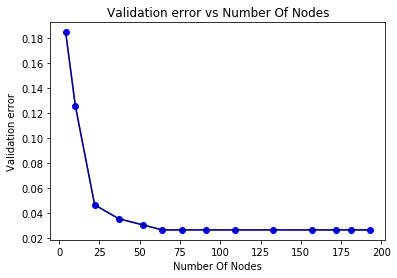

In [39]:
list_of_counts=[]
list_of_error=[]
global count_of_nodes
for i in range(1,15):
    
    tn = build_tree(train_df.values,max_depth=i)
    train_error=1-calculate_accuracy(test_df,tn)
    global count_of_nodes
    list_of_counts.append(count_of_nodes)
    count_of_nodes=0
    list_of_error.append(train_error)

x = np.array(list_of_counts)
y = np.array(list_of_error)
colors = (0,0,0)
area = np.pi*3
 
plt.plot(x,y,marker='o', color='b')
plt.plot(x, y,c=colors, alpha=0.5)
plt.title('Validation error vs Number Of Nodes')
plt.xlabel('Number Of Nodes')
plt.ylabel('Validation error')
plt.show()

## Part 6- Handling Missing Attributes



1.Missing data arise in almost all serious statistical analyses. If a variable is missing totally at arbitrary points in the event that the likelihood of missingness is the equivalent for all units, then such a data can be simply discarded.

2.Missingness is not arbitrary if it depends on information that has not been recorded and this information also predicts the missing values. In such cases,it must be explicitly modeled, or else you must accept some bias in your inferences.

3.Censoring and related missing-data mechanisms can be modeled by including more predictors in the trainingmodel.

4.Most Commonly used method is to replace each missing value with the mean of the observed values for that variable.

5.Using information from related observations is another strategy for handling missing values.The K-nearest strategy is used in this case.

6.For unordered categorical predictors, a simple and often useful approach to imputation is to add an extra category for the variable indicating missingness.

7.Predictive value imputation (PVI) methods are popular approaches to deal with missing value. They aim at estimating the missing value and impute them within both the training and the test set.

8.The surrogate variable (SV) approach is a special case of predictive value imputation(PVI).During the training process, when consid ering a predictor for a split, only the observations for which that predictor is not missing are used.

9.The Separate Class (SC) method replaces the missing value with a new value or a new class for all observations.

10.The C4.5 implementation has its own way to manage missing data, defined as a distribution-based imputation (DBI). When selecting the predictor to split upon, only the observations with known values are considered.


#### Required Headers

In [4]:
import warnings
warnings.filterwarnings('ignore')
import tables
import pandas as pd 
import math
import numpy as np
import random
from sklearn.metrics import precision_recall_fscore_support,accuracy_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


##### Splitting training and validation set

In [5]:
def divide_train_data(df, test_percent):
    
  
    test_size = int(test_percent * len(df))
   
    indices = df.index.tolist()
    split_indices = random.sample(indices,test_size)

    test_df = df.loc[split_indices]
    train_df = df.drop(split_indices)
    
    return train_df, test_df

In [6]:
def is_numeric(value):
    if isinstance(value, int) or isinstance(value, float) :
        return True

##### classify feature as categorical or numerical

In [7]:
def feature_type(attribute,threshold=10):
    
    
    global data
    total_values = data[attribute].unique()
    value1 = total_values[0]

    if (isinstance(value1, str)) or (len(total_values) <=threshold):
        return "categorical"
    else:
        return "continuous"
    

#####  Node Structure for CART Algorithm

In [8]:
class TreeNode:
    def __init__(self,attribute,value,true_branch,false_branch):
        self.attribute=attribute
        self.value=value
        self.true_branch=true_branch
        self.false_branch=false_branch
        
    def prediction(self, example):
      
        val=example[self.attribute]
        if feature_type(self.attribute)=="continuous":
            return val <= self.value
        else:
            return val == self.value

##### Leaf Node Structure

In [9]:
class LeafNode: 
    
    def __init__(self,entire_data):
        self.labels={}
        label_column=entire_data[:,-1] #last column
        unique_labels, unique_counts = np.unique(label_column, return_counts=True)
        for i in range(0,len(unique_labels)):
            self.labels[unique_labels[i]] = unique_counts[i]

##### Partitioning data set based on split value

In [10]:
def partition(data,feature_index,split_value):
    true_splits, false_splits = [], []
    global column_headers
 
    data1 = data[:, feature_index]
    feature=column_headers[feature_index]
    
    
    if feature_type(feature) == "continuous":
      
        true_splits = data[data1 <= split_value]
        false_splits = data[data1 >  split_value]
    else:
        true_splits=data[data1 == split_value]
        false_splits=data[data1 != split_value]
        
    return true_splits, false_splits

In [11]:
def find_potential_attribute(entire_sample,option):
    best_gain = 0
    best_attr=None
    best_val=None
    global column_headers
    sample_impurity = impurity(entire_sample,option)
    potential_splits=get_potential_splits(entire_sample)
   
    for feature_index in potential_splits:
        
        for value in potential_splits[feature_index]:
          
            true_splits,false_splits=partition(entire_sample,feature_index,value)
         
            if len(true_splits) == 0 or len(false_splits) == 0:
                continue
            gain = info_gain(true_splits, false_splits, sample_impurity,option)
            
            if gain >= best_gain:
                best_gain, best_attr,best_val = gain, feature_index,value

    
    return best_gain, best_attr,best_val

##### Finding possible split points for both numerical and cateogorical features
##### For numerical attributes boundary values are taken as split points

In [12]:
def get_potential_splits(entire_data):
    global data
    global column_headers
    potential_splits = {}
    no_of_columns = entire_data.shape[1]
   
    
   
     # excluding the last column which is the label
    for column_index in range(no_of_columns- 1):         
        values = entire_data[:, column_index]
        unique_values = np.unique(values)
       
        type_of_feature = feature_type(column_headers[column_index])
        if type_of_feature == "continuous":
            potential_splits[column_index] = []
            for index in range(len(unique_values)):
                potential_splits[column_index].append(unique_values[index])
        elif len(unique_values) > 1:
            potential_splits[column_index] = unique_values
    
    return potential_splits

Impurity Function to handle all 3 different measures of impurity

In [13]:

def impurity(data,option):
    
    if option==1:
        return gini(data)
    if option==2:
        return entropy(data)
    if option==3:
        return misclassification_rate(data)
    
    
    

In [14]:
def gini(data):
    label_column=data[:,-1]
    unique_classes, unique_counts = np.unique(label_column, return_counts=True)
    sample_size=data.shape[0]
    impurity=1
    for i in range (0, len(unique_classes)):
        prob_of_lbl = unique_counts[i]/float(sample_size)
        impurity -= prob_of_lbl**2
    return impurity   

In [15]:
def entropy(data):
    label_column=data[:,-1]
    unique_classes, unique_counts = np.unique(label_column, return_counts=True)
    sample_size=data.shape[0]
    sum=0    
    
    for i in range (0, len(unique_classes)):
        prob= unique_counts[i]/float(sample_size)
        sum+=(prob)*(math.log(prob,2))*-1
    return sum    
    

In [16]:
def misclassification_rate(data):
    label_column=data[:,-1]
    unique_classes, unique_counts = np.unique(label_column, return_counts=True)
    sample_size=data.shape[0]
    prob=unique_counts[0]/float(sample_size)
    return min(prob,1-prob) 

In [17]:
#Calculating the information gain
def info_gain(left, right, sample_impurity,option):
    p = float(len(left)) / (len(left) + len(right))
    return sample_impurity - p * impurity(left,option) - (1 - p) * impurity(right,option)

In [47]:
#Build the Binary CART tree recursively
count_of_nodes=0
def build_tree(entire_data, counter=0, min_samples=150, max_depth=5,option=1):
    global count_of_nodes

        
    gain,attr,value  = find_potential_attribute(entire_data,option)
    count_of_nodes+=1
    if gain == 0 or (len(entire_data)<min_samples) or counter==max_depth:
        
      
        return LeafNode(entire_data)
    
    else:
       
        counter+=1
        true_splits,false_splits=partition(entire_data,attr,value)
       
        true_branch = build_tree(true_splits,counter,max_depth=max_depth,option=option)
       
        false_branch = build_tree(false_splits,counter,max_depth=max_depth,option=option)
        
            
    return TreeNode(column_headers[attr], value,true_branch,false_branch)

In [19]:
#Utility Function to print the tree
def print_tree(node, spacing=""):
  
    if isinstance(node, LeafNode):
        print (spacing + "Predicted", node.labels)
        return

   
    print (spacing + str(node.attribute+ " "+ str(node.value)))

    print (spacing + "True Branch:")
    print_tree(node.true_branch, spacing + "  ")

    print (spacing + 'False Branch:')
    print_tree(node.false_branch, spacing + "  ")

In [20]:
 #returns the value with maximum probability of occurence in the leaf nodes
def predict(row, node):
    if isinstance(node, LeafNode):
        new_dict=node.labels
        max1 = max(new_dict.values())
       
        for key in new_dict.keys():
            if(new_dict[key]==max1):
                return key
       
    if node.prediction(row):
        return predict(row, node.true_branch)
    else:
        return predict(row, node.false_branch)

In [21]:
#calculating accuracy of the decision tree
def calculate_accuracy(df, tree):
    #adding a new column for the predicted value
    df["prediction"] = df.apply(predict, args=(tree,), axis=1)
    count=0
    for i,j in zip(df["prediction"],df["left"]):
        if i==j:
            count+=1
    
    return count/float(len(df["prediction"]))